#📌 Extracão

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_json('/content/TelecomX_Data.json')

In [3]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
dados_iniciais = dados.iloc[:,:2]
dados_normalizecustomer = pd.json_normalize(dados['customer'])
dados_normalizephone = pd.json_normalize(dados['phone'])
dados_normalizeinternet = pd.json_normalize(dados['internet'])
dados_normalizeaccount = pd.json_normalize(dados['account'])


In [5]:
dados_normalizados = pd.concat([dados_iniciais,dados_normalizecustomer,dados_normalizephone,dados_normalizeinternet,dados_normalizeaccount], axis=1)

In [6]:
list(dados_normalizados.columns)

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

#🔧 Transformação

In [7]:
dados_normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [8]:
variaveis_boleanas =['SeniorCitizen']
dados_normalizados[variaveis_boleanas] = dados_normalizados[variaveis_boleanas].astype('bool')

In [9]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
dados_normalizados['Charges.Total'] = pd.to_numeric(dados_normalizados['Charges.Total'], errors='coerce')
mediaChargesTotal = dados_normalizados['Charges.Total'].mean()
dados_normalizados['Charges.Total'] = dados_normalizados['Charges.Total'].fillna(mediaChargesTotal)

In [11]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [12]:
colunas_transformacao = ['Churn','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
dados_normalizados[colunas_transformacao] = dados_normalizados[colunas_transformacao].replace({'Yes':1,'No':0})

<ipython-input-12-aab3a30edd84>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_normalizados[colunas_transformacao] = dados_normalizados[colunas_transformacao].replace({'Yes':1,'No':0})


In [13]:
for col in colunas_transformacao:
    # Filtra valores diferentes de 0 e 1
    valores_diferentes = dados_normalizados[~dados_normalizados[col].isin([0, 1])][col].unique()

    if len(valores_diferentes) > 0:
        print(f"[{col}] → valores diferentes de 0 e 1 encontrados: {valores_diferentes}")


[Churn] → valores diferentes de 0 e 1 encontrados: ['']
[MultipleLines] → valores diferentes de 0 e 1 encontrados: ['No phone service']
[OnlineSecurity] → valores diferentes de 0 e 1 encontrados: ['No internet service']
[OnlineBackup] → valores diferentes de 0 e 1 encontrados: ['No internet service']
[DeviceProtection] → valores diferentes de 0 e 1 encontrados: ['No internet service']
[TechSupport] → valores diferentes de 0 e 1 encontrados: ['No internet service']
[StreamingTV] → valores diferentes de 0 e 1 encontrados: ['No internet service']
[StreamingMovies] → valores diferentes de 0 e 1 encontrados: ['No internet service']


In [14]:
dados_normalizados['MultipleLines'] = dados_normalizados['MultipleLines'].replace('No phone service', 0)
dados_normalizados['OnlineSecurity'] = dados_normalizados['OnlineSecurity'].replace('No internet service', 0)
dados_normalizados['OnlineBackup'] = dados_normalizados['OnlineBackup'].replace('No internet service', 0)
dados_normalizados['DeviceProtection'] = dados_normalizados['DeviceProtection'].replace('No internet service', 0)
dados_normalizados['TechSupport'] = dados_normalizados['TechSupport'].replace('No internet service', 0)
dados_normalizados['StreamingTV'] = dados_normalizados['StreamingTV'].replace('No internet service', 0)
dados_normalizados['StreamingMovies'] = dados_normalizados['StreamingMovies'].replace('No internet service', 0)

<ipython-input-14-8f87a4791c61>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_normalizados['MultipleLines'] = dados_normalizados['MultipleLines'].replace('No phone service', 0)
<ipython-input-14-8f87a4791c61>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_normalizados['OnlineSecurity'] = dados_normalizados['OnlineSecurity'].replace('No internet service', 0)
<ipython-input-14-8f87a4791c61>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old be

In [15]:
contador_vazios = (dados_normalizados['Churn'] == '').sum()
print(f"Total de células vazias ('') na coluna 'Churn': {contador_vazios}")

Total de células vazias ('') na coluna 'Churn': 224


In [16]:
dados_normalizados['Churn'] = dados_normalizados['Churn'].replace('', 0)

<ipython-input-16-80ee42b923c7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_normalizados['Churn'] = dados_normalizados['Churn'].replace('', 0)


In [17]:
dados_normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,False,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,False,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,False,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,True,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,True,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,False,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,False,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,False,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,False,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [18]:
dados_normalizados['Contract'].value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [19]:
# Garantir que as colunas envolvidas estão como numéricas
dados_normalizados['Charges.Total'] = pd.to_numeric(dados_normalizados['Charges.Total'], errors='coerce')
dados_normalizados['tenure'] = pd.to_numeric(dados_normalizados['tenure'], errors='coerce')

# Criar a nova coluna 'daily.account'
dados_normalizados['daily.account'] = dados_normalizados.apply(
    lambda row: float(row['Charges.Total']) / (float(row['tenure']) * 30)
    if pd.notnull(row['Charges.Total']) and pd.notnull(row['tenure']) and row['tenure'] != 0
    else float('nan'),
    axis=1
)

# Arredondar (opcional)
dados_normalizados['daily.account'] = dados_normalizados['daily.account']


In [20]:
dados_normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,daily.account
0,0002-ORFBO,0,Female,False,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.197407
1,0003-MKNFE,0,Male,False,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,2.008889
2,0004-TLHLJ,1,Male,False,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.340417
3,0011-IGKFF,1,Male,True,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.173974
4,0013-EXCHZ,1,Female,True,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.971111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,False,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.904872
7263,9992-RRAMN,1,Male,False,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.838939
7264,9992-UJOEL,0,Male,False,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.545833
7265,9993-LHIEB,0,Male,False,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.302313


In [21]:
dados_normalizados['daily.account'] = dados_normalizados['daily.account'].fillna(0)


In [22]:
# Calcular a média dos valores diferentes de zero
media = dados_normalizados.loc[dados_normalizados['daily.account'] != 0, 'daily.account'].mean()

# Substituir os zeros pela média calculada
dados_normalizados['daily.account'] = dados_normalizados['daily.account'].replace(0, media)


In [23]:
contagem_zeros = (dados_normalizados['daily.account'] == 0).sum()
print(f"Quantidade de zeros na coluna 'Daily.Account': {contagem_zeros}")

Quantidade de zeros na coluna 'Daily.Account': 0


In [24]:
for coluna in colunas_transformacao:
  valores_unicos = dados_normalizados[coluna].unique()
  valores_diferentes = [valor for valor in valores_unicos if valor not in [0, 1]]
  if valores_diferentes:
    print(f"Valores diferentes de 0 e 1 encontrados na coluna '{coluna}': {valores_diferentes}")

In [25]:
for coluna in colunas_transformacao:
  dados_normalizados[coluna] = dados_normalizados[coluna].astype(bool)

In [26]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   object 


In [27]:
dados_normalizados.shape


(7267, 22)

# 📊  Carga e análise

**Análise descritiva**

In [28]:
analise_descritiva = dados_normalizados.describe()
analise_descritiva

,tenure,Charges.Monthly,Charges.Total,daily.account
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2280.634213,2.158564
std,24.571773,30.129572,2266.915104,1.006679
min,0.000000,18.250000,18.800000,0.459167
25%,9.000000,35.425000,401.400000,1.197839
50%,29.000000,70.300000,1394.550000,2.340936
75%,55.000000,89.875000,3778.525000,3.005805
max,72.000000,118.750000,8684.800000,4.046667


**Distribuição da Evasão**

In [29]:
list(dados_normalizados.columns)

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'daily.account']

In [30]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   object 


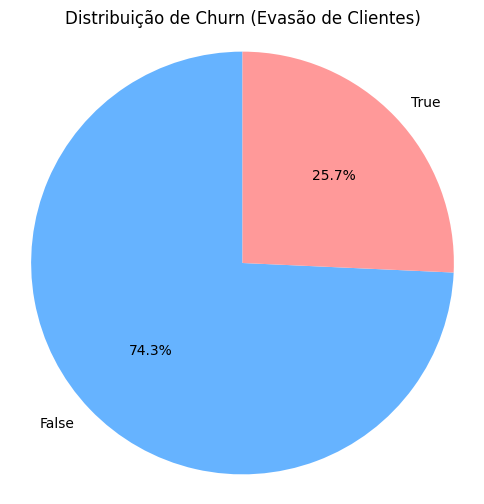

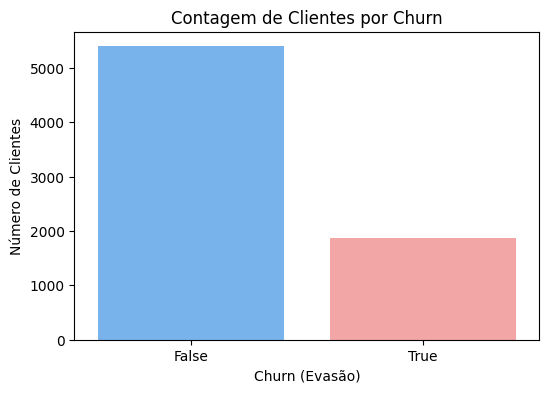

In [31]:
# Gráfico de pizza
churn_counts = dados_normalizados['Churn'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribuição de Churn (Evasão de Clientes)')
plt.axis('equal')
plt.show()

# Gráfico de barras (corrigido para evitar warning)
plt.figure(figsize=(6, 4))
sns.countplot(
    data=dados_normalizados,
    x='Churn',
    hue='Churn',
    legend=False,
    palette=['#66b3ff', '#ff9999']
)
plt.title('Contagem de Clientes por Churn')
plt.xlabel('Churn (Evasão)')
plt.ylabel('Número de Clientes')
plt.show()


**Contagem de Evasão por Variáveis Categóricas**

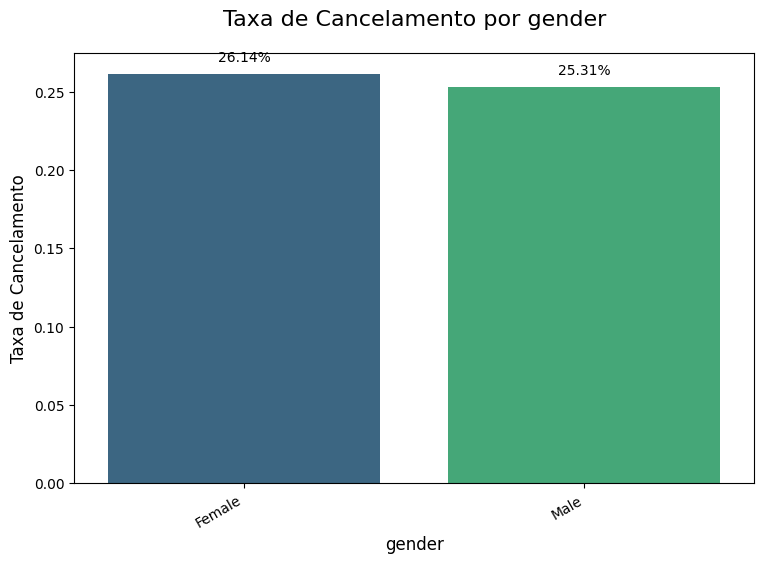

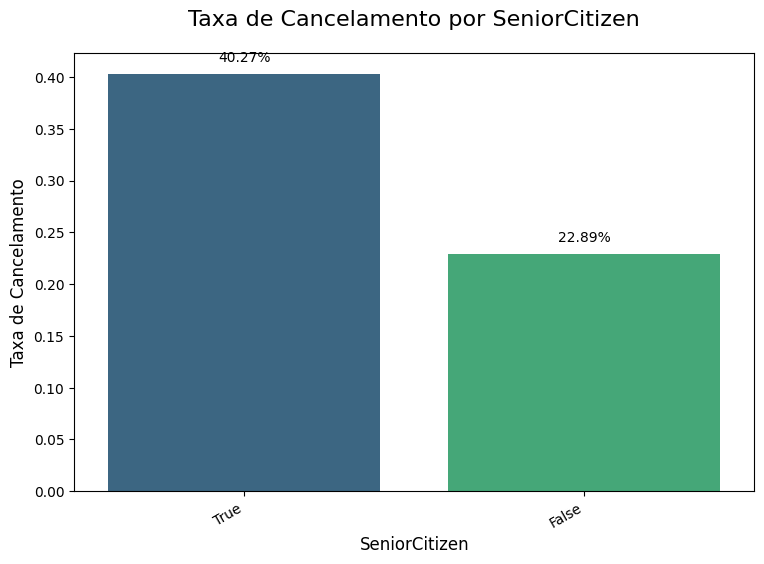

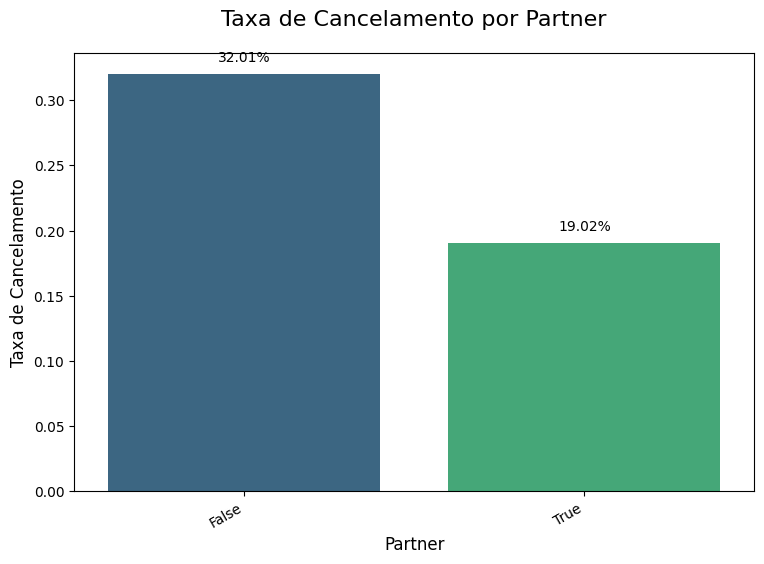

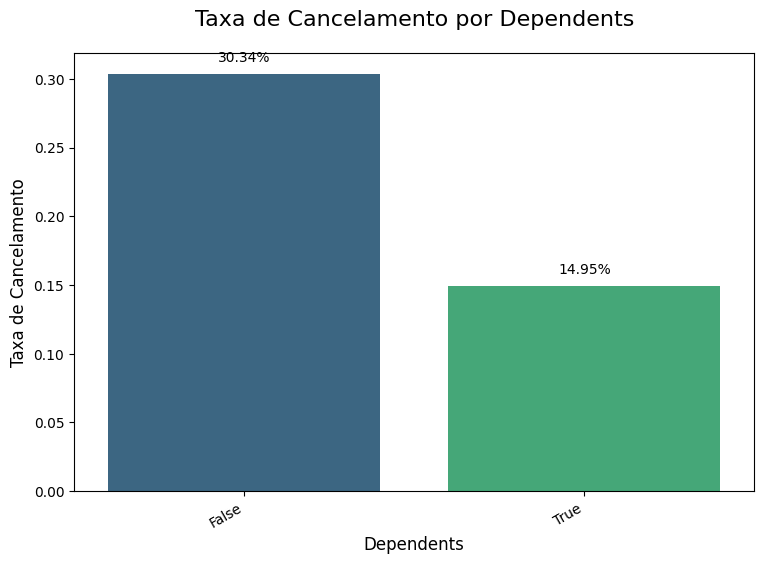

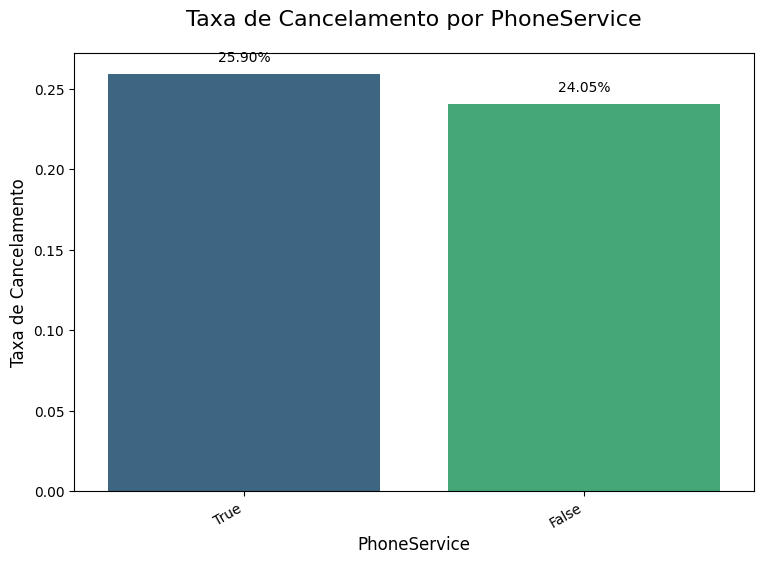

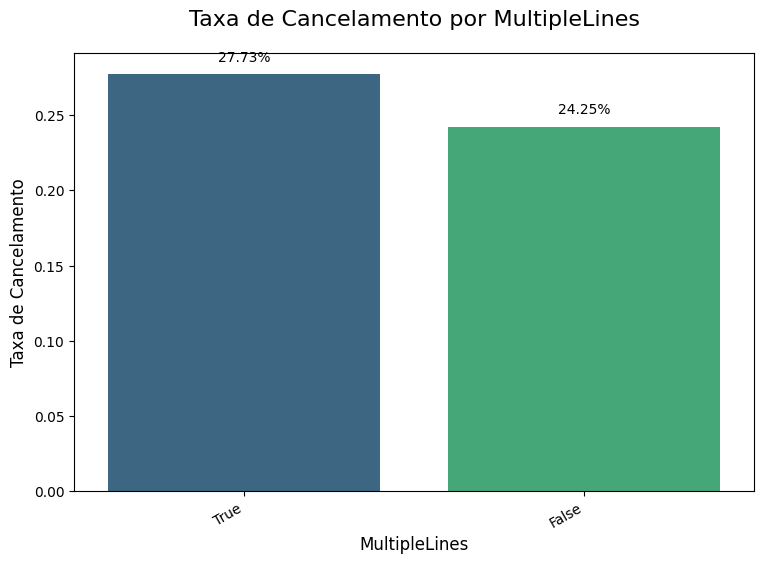

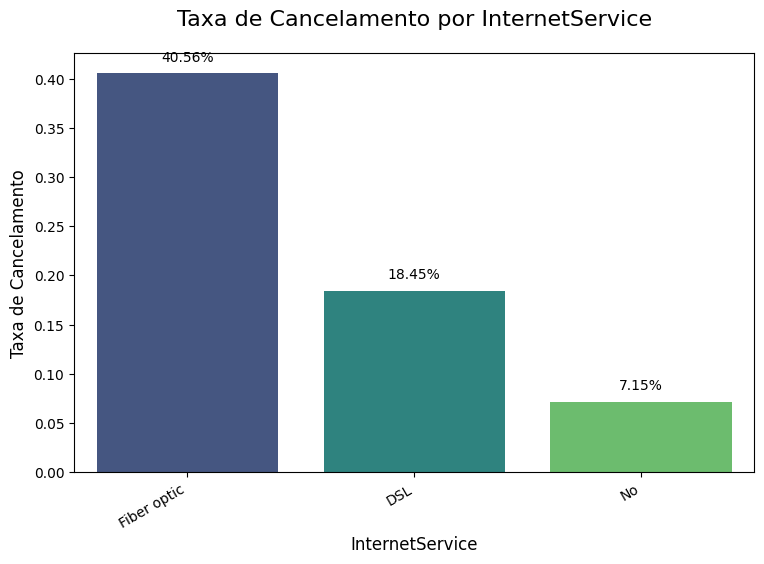

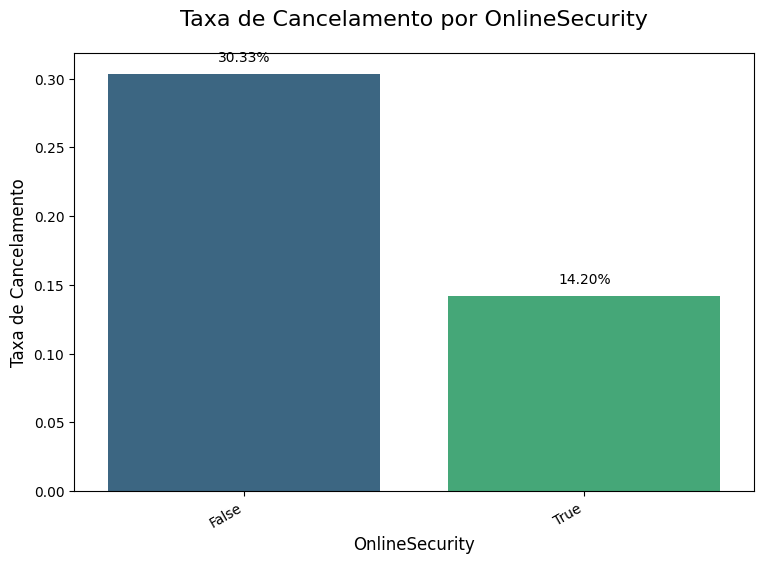

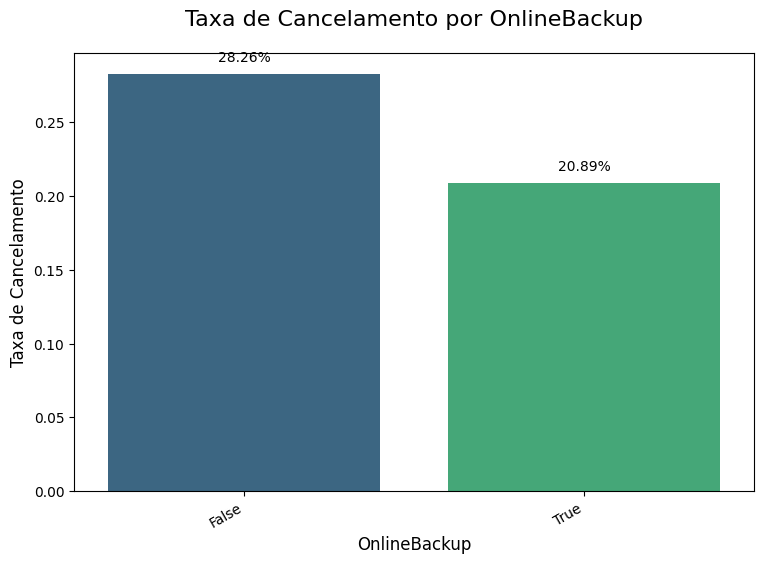

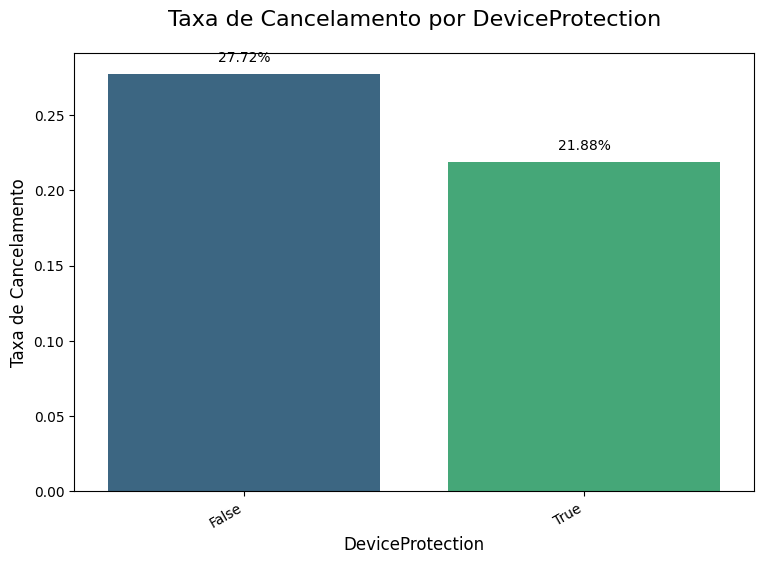

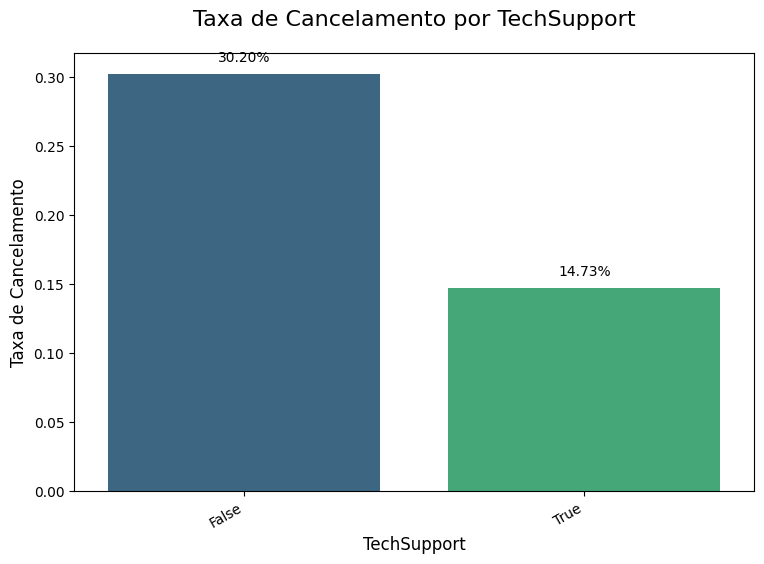

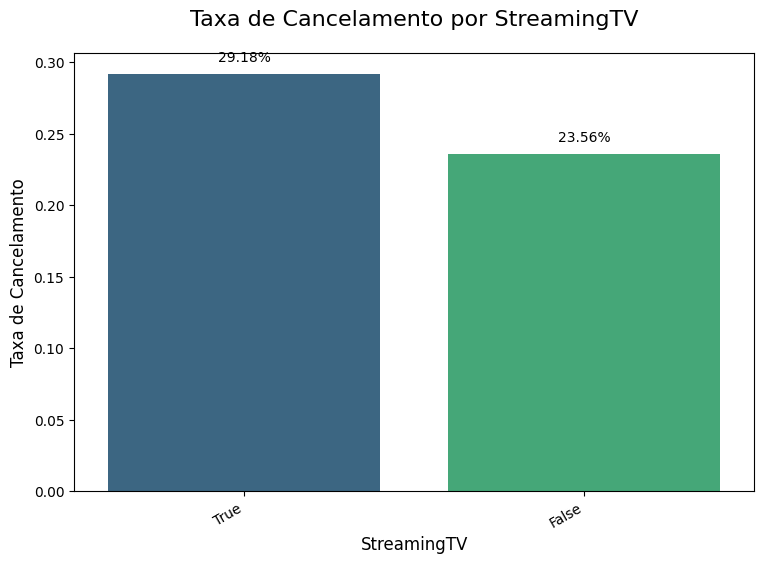

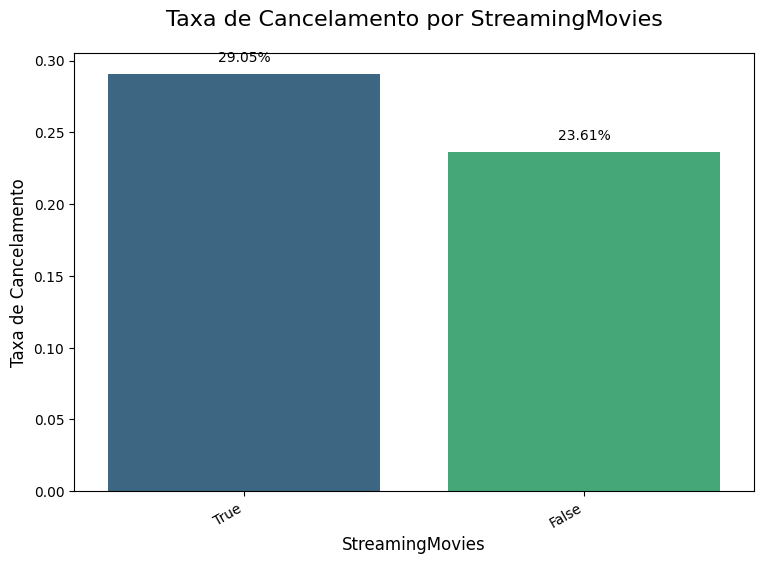

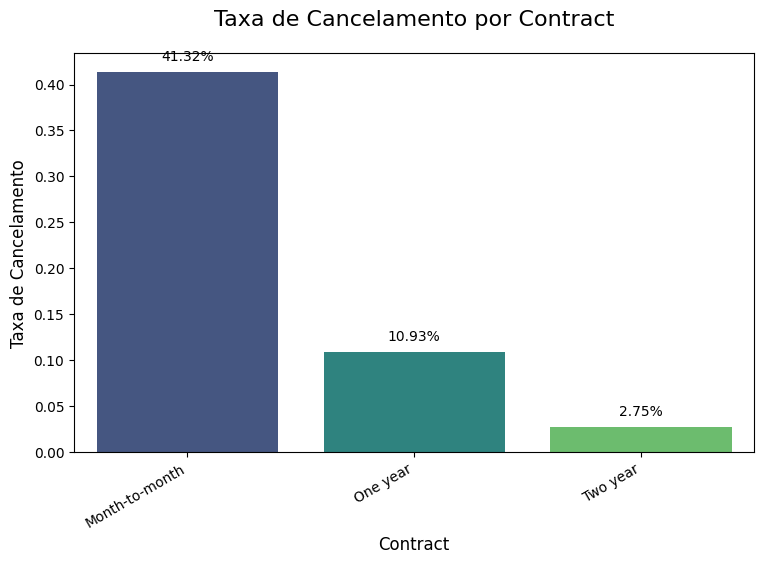

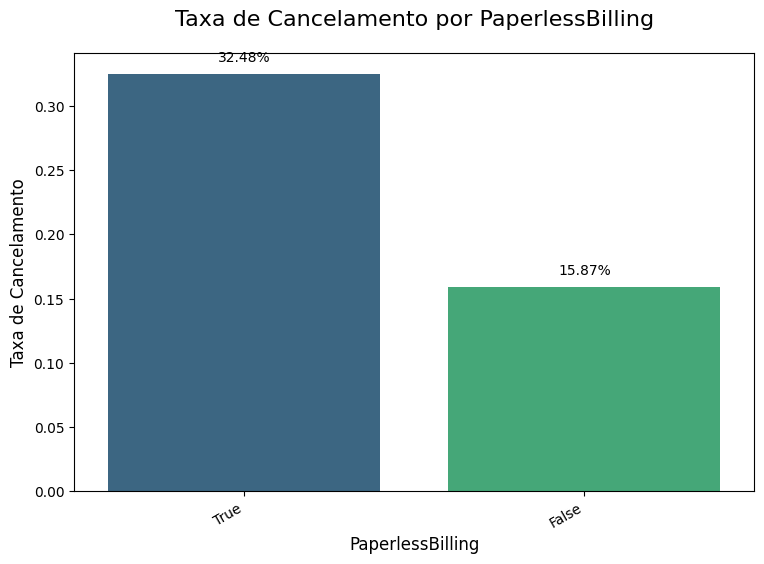

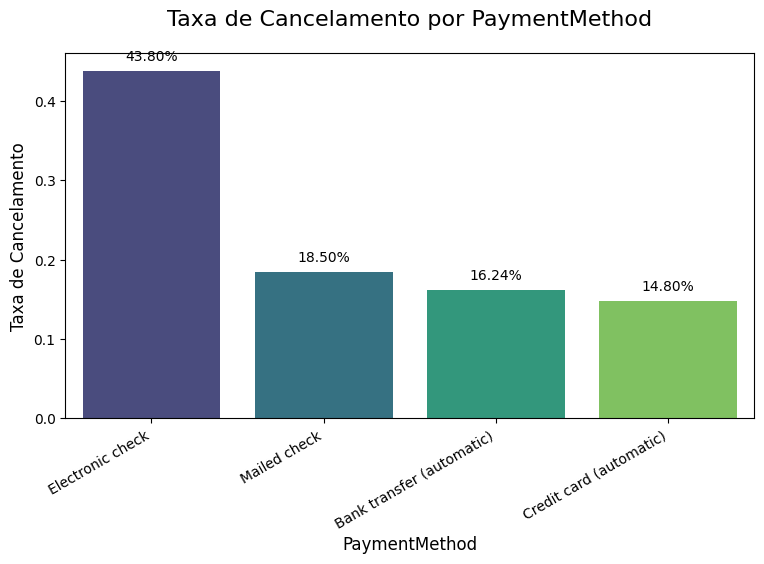

In [32]:
variaveis_categoricas = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for var in variaveis_categoricas:
    taxa_churn = dados_normalizados.groupby(var)['Churn'].mean().sort_values(ascending=False)

    plt.figure(figsize=(8, 6))  # aumentamos o tamanho vertical
    ax = sns.barplot(
        x=taxa_churn.index.astype(str),
        y=taxa_churn.values,
        hue=taxa_churn.index.astype(str),
        palette='viridis',
        dodge=False,
        legend=False
    )

    plt.title(f'Taxa de Cancelamento por {var}', fontsize=16, pad=20)
    plt.ylabel('Taxa de Cancelamento', fontsize=12)
    plt.xlabel(var, fontsize=12)
    plt.xticks(rotation=30, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    # Texto acima das barras com deslocamento proporcional (3% da altura da barra)
    for i, v in enumerate(taxa_churn.values):
        ax.text(i, v + 0.03 * max(taxa_churn.values), f"{v:.2%}", ha='center', fontsize=10)

    plt.tight_layout(pad=2)  # adiciona espaçamento extra
    plt.show()




**Contagem de Evasão por Variáveis Numéricas**

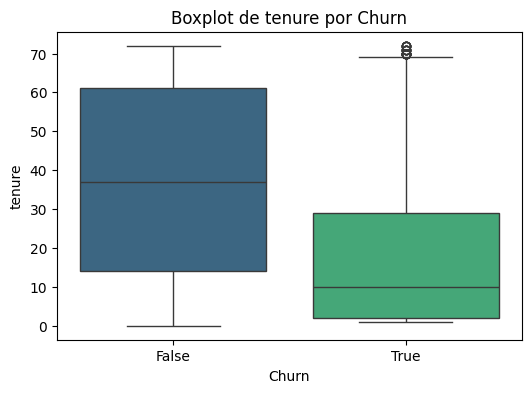

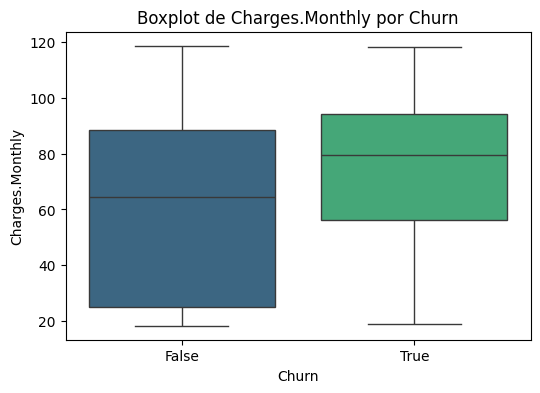

In [33]:
variaveis_numericas = ['tenure', 'Charges.Monthly']

for var in variaveis_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        data=dados_normalizados,
        x='Churn',
        y=var,
        hue='Churn',          # adiciona hue igual ao x para evitar warning
        palette='viridis',
        dodge=False,          # para não separar as caixas por hue (evita duplicação)
        legend=False          # esconde legenda que ficaria repetida
    )
    plt.title(f'Boxplot de {var} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.show()




**Distribuição de cobranças**

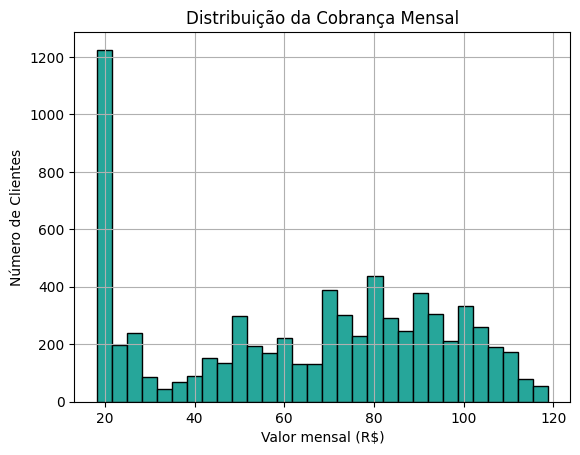

In [34]:
dados_normalizados['Charges.Monthly'].hist(bins=30, color='#26a69a', edgecolor='black')
plt.title('Distribuição da Cobrança Mensal')
plt.xlabel('Valor mensal (R$)')
plt.ylabel('Número de Clientes')
plt.show()

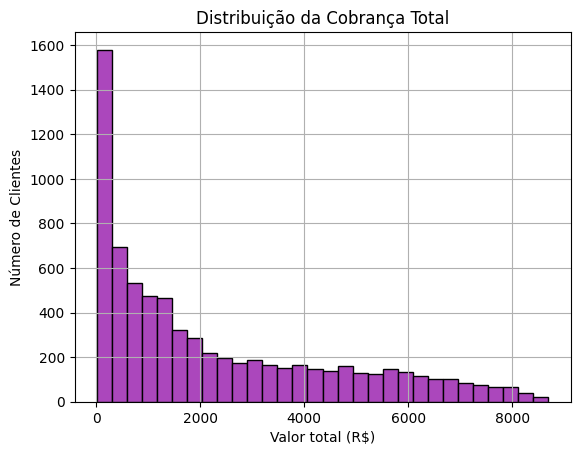

In [35]:

dados_normalizados['Charges.Total'].hist(bins=30, color='#ab47bc', edgecolor='black')
plt.title('Distribuição da Cobrança Total')
plt.xlabel('Valor total (R$)')
plt.ylabel('Número de Clientes')
plt.show()

**Distribuição do tempo de contrato**

In [36]:
dados_normalizados.groupby('Churn')[['tenure', 'Charges.Monthly', 'Charges.Total', 'daily.account']].agg(['mean', 'median', 'std'])


tenure                   Charges.Monthly                    \
            mean median        std            mean median        std   
Churn                                                                  
False  37.321045   37.0  24.178367       61.354224  64.50  31.105006   
True   17.979133   10.0  19.531123       74.441332  79.65  24.666053   

      Charges.Total                       daily.account                      
               mean   median          std          mean    median       std  
Churn                                                                        
False   2539.911435  1672.35  2328.013949      2.046887  2.145304  1.037416  
True    1531.796094   703.55  1890.822994      2.481105  2.643750  0.832040

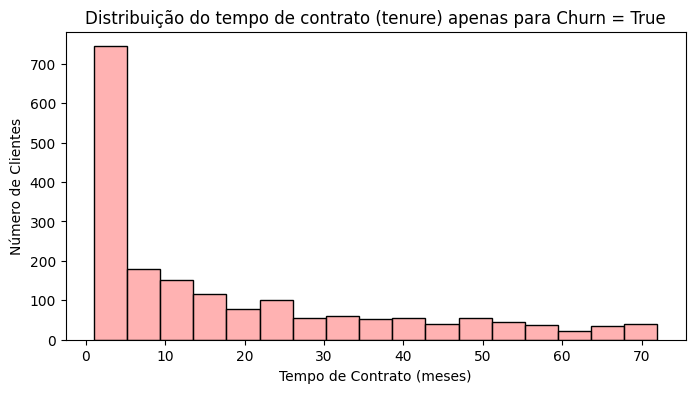

In [37]:


# Filtra somente clientes que cancelaram (Churn == True ou 1)
dados_churn_true = dados_normalizados[dados_normalizados['Churn'] == 1]

plt.figure(figsize=(8,4))
sns.histplot(data=dados_churn_true, x='tenure', color='#ff9999')  # cor para churn = True
plt.title('Distribuição do tempo de contrato (tenure) apenas para Churn = True')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Número de Clientes')
plt.show()


**Extra: Análise de Correlação entre Variáveis**

In [38]:
# Matriz de correlação com foco em Churn
correlacoes = dados_normalizados.corr(numeric_only=True)

# Ordenar pela correlação com Churn
correlacao_churn = correlacoes['Churn'].sort_values(ascending=False)

correlacoes

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,daily.account
Churn,1.000000,0.146733,-0.148546,-0.161384,-0.344079,0.012571,0.039343,-0.166828,-0.080163,-0.063452,-0.160440,0.062430,0.060586,0.186666,0.189866,-0.194389,0.188544
SeniorCitizen,0.146733,1.000000,0.022970,-0.212952,0.018187,0.010060,0.144567,-0.037953,0.068824,0.060358,-0.059376,0.103655,0.119374,0.157734,0.220388,0.103484,0.217744
Partner,-0.148546,0.022970,1.000000,0.448900,0.377551,0.018828,0.141187,0.141392,0.139523,0.153209,0.116228,0.124754,0.115729,-0.011201,0.097122,0.316668,0.097278
Dependents,-0.161384,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.027894,0.083951,0.023686,0.014797,0.062586,-0.015030,-0.040151,-0.111752,-0.115832,0.063847,-0.114310
tenure,-0.344079,0.018187,0.377551,0.159892,1.000000,0.010205,0.331678,0.327252,0.361291,0.361792,0.322139,0.280738,0.286841,0.007949,0.247982,0.824034,0.245996
PhoneService,0.012571,0.010060,0.018828,-0.003863,0.010205,1.000000,0.280379,-0.093341,-0.052165,-0.073033,-0.097573,-0.025362,-0.034345,0.013624,0.246709,0.113638,0.246932
MultipleLines,0.039343,0.144567,0.141187,-0.027894,0.331678,0.280379,1.000000,0.098396,0.205156,0.202172,0.098053,0.257405,0.259268,0.163225,0.490699,0.468584,0.489695
OnlineSecurity,-0.166828,-0.037953,0.141392,0.083951,0.327252,-0.093341,0.098396,1.000000,0.286432,0.275699,0.356113,0.177332,0.189881,-0.001693,0.298307,0.413341,0.298145
OnlineBackup,-0.080163,0.068824,0.139523,0.023686,0.361291,-0.052165,0.205156,0.286432,1.000000,0.306665,0.292422,0.283195,0.276788,0.131187,0.442974,0.512479,0.440280
DeviceProtection,-0.063452,0.060358,0.153209,0.014797,0.361792,-0.073033,0.202172,0.275699,0.306665,1.000000,0.332267,0.394421,0.402720,0.105211,0.483590,0.524303,0.482078


In [39]:
servicos = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

dados_normalizados['Qtd.Servicos'] = dados_normalizados[servicos].sum(axis=1)


In [40]:
dados_normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,daily.account,Qtd.Servicos
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,True,True,False,One year,True,Mailed check,65.60,593.30,2.197407,4
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,False,True,Month-to-month,False,Mailed check,59.90,542.40,2.008889,3
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,False,False,False,Month-to-month,True,Electronic check,73.90,280.85,2.340417,2
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,False,True,True,Month-to-month,True,Electronic check,98.00,1237.85,3.173974,5
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,True,True,False,Month-to-month,True,Mailed check,83.90,267.40,2.971111,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,Female,False,False,False,13,True,False,DSL,...,True,False,False,One year,False,Mailed check,55.15,742.90,1.904872,3
7263,9992-RRAMN,True,Male,False,True,False,22,True,True,Fiber optic,...,False,False,True,Month-to-month,True,Electronic check,85.10,1873.70,2.838939,3
7264,9992-UJOEL,False,Male,False,False,False,2,True,False,DSL,...,False,False,False,Month-to-month,True,Mailed check,50.30,92.75,1.545833,2
7265,9993-LHIEB,False,Male,False,True,True,67,True,False,DSL,...,True,False,True,Two year,False,Mailed check,67.85,4627.65,2.302313,5


In [41]:
dados_normalizados['total_servicos'] = dados_normalizados[servicos].astype(int).sum(axis=1)

In [42]:
correlacao = dados_normalizados[['total_servicos', 'Churn']].corr()
print(correlacao)

                total_servicos     Churn
total_servicos        1.000000 -0.064642
Churn                -0.064642  1.000000


#📄Relatorio Final

## **1. Introdução**

Este relatório apresenta os resultados de uma análise de dados conduzida com base na base de dados **`TelecomX_BR.json`**, com o objetivo de apoiar a empresa **Telecom X** na identificação de fatores determinantes para o **churn de clientes** (cancelamento de serviços).

A análise faz parte do projeto **"Churn de Clientes"**, em resposta à crescente preocupação da empresa com a **alta taxa de cancelamento** dos seus serviços. A equipe foi desafiada a realizar uma investigação exploratória com foco em:

- Importação e manipulação de dados provenientes de um arquivo JSON.
- Aplicação de conceitos de **ETL (Extração, Transformação e Carga)**.
- Limpeza e transformação de dados visando consistência e qualidade.
- Criação de visualizações estratégicas.
- Extração de **insights relevantes** para auxiliar nas decisões empresariais.

O processo foi inteiramente realizado em **Python**, utilizando bibliotecas como `pandas`, `numpy`, `matplotlib`, `seaborn`, entre outras.

---

## **2. Etapas da Análise**

### **2.1. Extração e Importação de Dados**

A base de dados foi carregada a partir de um arquivo JSON. A estrutura original continha inconsistências típicas de dados reais, como valores ausentes, tipos incompatíveis e codificações pouco padronizadas.

### **2.2. Tratamento Inicial**

Durante essa etapa, foram adotadas as seguintes medidas:

- Conversão de colunas com valores `Yes/No` para valores binários (`1/0`), padronizando variáveis booleanas.
- Substituição de valores nulos:
    - Em colunas booleanas: preenchimento com `False`.
    - Em colunas numéricas: preenchimento com a **média da coluna**.
- Conversão de tipos de dados para as respectivas categorias (inteiros, floats, strings e booleanos).
- Criação de uma nova variável chamada **`dailyaccount`**, a qual representa a média diária de faturamento, calculada a partir da divisão do valor mensal por aproximadamente 30 dias. Essa métrica permite uma análise mais refinada do comportamento financeiro dos clientes.

---

## **3. Análise Exploratória de Dados (EDA)**

A Análise Exploratória de Dados foi realizada com o objetivo de **entender o perfil dos clientes**, detectar **padrões de comportamento** e **identificar correlações** com o cancelamento.

### **3.1. Análise Estatística Descritiva**

Foram calculadas medidas de tendência central e dispersão para todas as variáveis numéricas:

- **Média**, **mediana**, **desvio padrão** e **quartis**.
- Detecção de outliers.
- Comparações entre clientes que evadiram e os que permaneceram ativos.

---

### **3.2. Distribuição Geral da Evasão**

- **Taxa total de evasão:** **25,7%** dos clientes cancelaram seus serviços.
- Essa taxa foi visualizada por meio de gráficos de barras e pizza, demonstrando de forma clara a proporção entre clientes ativos e cancelados.

---

### **3.3. Análise por Variáveis Categóricas**

A seguir, estão listadas as taxas de evasão por categorias:

| Variável | Insight Relevante |
| --- | --- |
| **Gender** | Homens e mulheres têm taxas de evasão semelhantes. |
| **SeniorCitizen** | Clientes idosos evadem **40,27%** das vezes – valor acima da média. |
| **Partner** | Clientes sem parceiro(a) têm evasão de **32,01%**. |
| **Dependents** | Contas sem dependentes têm taxa de evasão de **30,34%**. |
| **PhoneService** | Não influencia significativamente na evasão. |
| **MultipleLines** | Sem impacto relevante na evasão. |
| **InternetService** | Clientes com fibra óptica cancelam mais – possível insatisfação com o serviço. |
| **OnlineSecurity** | Clientes **sem segurança online** cancelam mais – serviço valorizado. |
| **OnlineBackup** | Diferença pequena entre evasão de quem tem ou não – sem impacto relevante. |
| **DeviceProtection** | Não influencia de forma significativa. |
| **TechSupport** | Clientes sem suporte técnico evadem mais – serviço percebido como valioso. |
| **StreamingTV/Movies** | Serviços de streaming não são determinantes na decisão de cancelamento. |
| **Contract** | Planos **mensais** têm evasão de **41,32%** – planos mais longos têm maior retenção. |
| **PaperlessBilling** | Faturas eletrônicas associadas a evasão de **32,48%**. |
| **PaymentMethod** | Clientes que utilizam **Electronic Check** têm maior propensão ao cancelamento. |

---

### **3.4. Análise por Variáveis Numéricas com Gráficos**

### **Tenure (Tempo de Contrato)**

- Boxplots mostram que a evasão é significativamente mais comum nos **primeiros 30 meses** de contrato.

### **Monthly Charges (Cobrança Mensal)**

- Clientes que pagam entre **R$60 e R$100/mês** são os que mais cancelam.
- Distribuição mostra um pico de clientes em **R$20/mês**, com redução acentuada acima de **R$80**.

### **Total Charges (Cobrança Total)**

- A maioria dos clientes possui cobranças acumuladas inferiores a **R$2.000**, o que pode indicar relacionamentos curtos ou baixo uso.

### **Distribuição da Duração do Contrato**

- A maior parte dos clientes está nos primeiros meses de contrato, com picos acima de **700 clientes** com menos de 10 meses, o que corrobora a tendência de evasão precoce.

# **Atividade Extra: Análise de Correlação**

Por fim, foi realizada uma análise de correlação entre as variáveis numéricas da base. Um dos focos foi a correlação entre a variável "Total de Serviços" e a variável *Churn*, que resultou em um valor de **0,01634**. Este valor indica uma correlação praticamente nula, sugerindo que a quantidade de serviços contratados por um cliente não tem influência significativa sobre a decisão de continuar ou cancelar o serviço.

```
            total_servicos    Churn
```

total_servicos 1.00000 0.01634 Churn 0.01634 1.00000

---

## **4. Conclusão**

Através da análise exploratória da base de dados **TelecomX_BR.json**, foi possível identificar variáveis críticas para o entendimento do **churn** de clientes. Os principais fatores associados à evasão são:

- Tipo de contrato (planos mensais);
- Ausência de serviços complementares como **suporte técnico** e **segurança online**;
- Perfil do cliente (idosos, não parceiros e sem dependentes);
- Método de pagamento (Electronic Check);
- Tempo de permanência inferior a 30 meses.

Esses **insights oferecem subsídios diretos para a formulação de estratégias de retenção**, como:

- Campanhas de fidelização focadas nos primeiros meses de contrato;
- Incentivos para migração a planos anuais;
- Investimento em serviços valorizados (segurança e suporte);
- Melhor análise de métodos de pagamento para mitigar riscos de evasão.

---

## **5. Recomendações Finais**

1. **Segmentar clientes por risco de evasão** e priorizar campanhas direcionadas.
2. **Melhorar os serviços de fibra óptica**, que apresentam altos índices de insatisfação.
3. **Reavaliar o modelo de faturamento eletrônico**, que embora moderno, está associado à maior evasão.
4. **Oferecer planos com vantagens a longo prazo**, como descontos progressivos ou benefícios por tempo de permanência.
5. **Investir em coleta de feedbacks** para avaliar o motivo de evasão nos primeiros meses.